In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, GRU, TimeDistributed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [20]:
DATASET_PATH = r"C:\Users\RAJ\Downloads\archive (2).zip"

# Extract dataset if not already extracted
import zipfile
extract_path = os.path.join(os.path.dirname(DATASET_PATH), "Data")
if not os.path.exists(extract_path):
    with zipfile.ZipFile(DATASET_PATH, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(DATASET_PATH))
    print("✅ Dataset extracted!")
else:
    print("✅ Dataset already extracted!")


✅ Dataset extracted!


In [22]:
for label, folder in class_dirs.items():
    for sub_folder in os.listdir(folder):
        sub_folder_path = os.path.join(folder, sub_folder)
        if os.path.isdir(sub_folder_path):
            for img_file in os.listdir(sub_folder_path):
                img_path = os.path.join(sub_folder_path, img_file)
                if not os.path.exists(img_path):
                    print(f"❌ File Not Found: {img_path}")


In [24]:
import os

def clean_filenames(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            new_filename = filename.encode("utf-8", "ignore").decode("utf-8")  # Remove invalid characters
            new_filename = new_filename.replace("[", "").replace("]", "").replace("├╝", "_")  # Remove special characters
            old_path = os.path.join(root, filename)
            new_path = os.path.join(root, new_filename)
            
            if old_path != new_path:
                os.rename(old_path, new_path)
                print(f"✅ Renamed: {old_path} → {new_path}")

DATASET_PATH = r"C:\Users\RAJ\Downloads\Data"
clean_filenames(DATASET_PATH)


✅ Renamed: C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik├╝ler-parankimal kanama_0_10.jpg → C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik_ler-parankimal kanama_0_10.jpg
✅ Renamed: C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik├╝ler-parankimal kanama_0_11.jpg → C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik_ler-parankimal kanama_0_11.jpg
✅ Renamed: C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik├╝ler-parankimal kanama_0_12.jpg → C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik_ler-parankimal kanama_0_12.jpg
✅ Renamed: C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik├╝ler-parankimal kanama_0_13.jpg → C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik_ler-parankimal kanama_0_13.jpg
✅ Renamed: C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik├╝ler-parankimal kanama_0_14.jpg → C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA\3[3]\ventrik_ler-parankimal kanama_0_14.jpg
✅ Renamed: C:\Users\

In [25]:
IMG_SIZE = (128, 128)  # Resize images to 128x128
data = []
labels = []

# Define classes
class_dirs = {
    "Hemorrhagic": os.path.join(extract_path, "Hemorrhagic", "KANAMA"),
    "NORMAL": os.path.join(extract_path, "NORMAL")
}

# Load images from both classes
for label, folder in class_dirs.items():
    for sub_folder in os.listdir(folder):
        sub_folder_path = os.path.join(folder, sub_folder)
        if os.path.isdir(sub_folder_path):
            for img_file in os.listdir(sub_folder_path):
                img_path = os.path.join(sub_folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
                img = cv2.resize(img, IMG_SIZE)  # Resize image
                data.append(img)
                labels.append(label)

# Convert to numpy arrays
data = np.array(data) / 255.0  # Normalize images
labels = np.array(labels)

print(f"✅ Loaded {len(data)} images!")


✅ Loaded 6795 images!


In [26]:
from PIL import Image

def test_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify if it's a valid image
            except Exception as e:
                print(f"❌ Corrupt/Invalid Image: {file_path} → {e}")

DATASET_PATH = r"C:\Users\RAJ\Downloads\Data"
test_images(DATASET_PATH)


In [27]:
import cv2
import os

for root, _, files in os.walk(DATASET_PATH):
    for file in files:
        img_path = os.path.join(root, file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Cannot read: {img_path}")


In [29]:
# Check if train_df, val_df, and test_df exist
print(f"Train DataFrame: {train_df.shape}" if 'train_df' in locals() else "train_df is not defined")
print(f"Validation DataFrame: {val_df.shape}" if 'val_df' in locals() else "val_df is not defined")
print(f"Test DataFrame: {test_df.shape}" if 'test_df' in locals() else "test_df is not defined")


train_df is not defined
val_df is not defined
test_df is not defined


In [31]:
print(df.head())  # Show first few rows
print(df.shape)   # Show the number of rows and columns


Empty DataFrame
Columns: [image_path, label]
Index: []
(0, 2)


In [33]:
print(len(image_paths))  # Should print number of images
print(len(labels))       # Should match image_paths
print(image_paths[:5])   # Print first 5 paths
print(labels[:5])        # Print first 5 labels


0
6795
[]
['Hemorrhagic' 'Hemorrhagic' 'Hemorrhagic' 'Hemorrhagic' 'Hemorrhagic']


In [34]:
import os

base_dir = r"C:\Users\RAJ\Downloads\Data"  # Ensure correct path

hemorrhagic_dir = os.path.join(base_dir, "Hemorrhagic", "KANAMA")
normal_dir = os.path.join(base_dir, "NORMAL")

image_paths = []
labels = []

# Load hemorrhagic images
for root, _, files in os.walk(hemorrhagic_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure only valid image formats
            full_path = os.path.join(root, file)
            if os.path.exists(full_path):  # Ensure file exists
                image_paths.append(full_path)
                labels.append("Hemorrhagic")
            else:
                print(f"⚠️ Missing file: {full_path}")

# Load normal images
for root, _, files in os.walk(normal_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            full_path = os.path.join(root, file)
            if os.path.exists(full_path):
                image_paths.append(full_path)
                labels.append("Normal")
            else:
                print(f"⚠️ Missing file: {full_path}")

print(f"✅ Total images found: {len(image_paths)}")


✅ Total images found: 6795


In [35]:
print(len(image_paths))  # Should match labels count
print(len(labels))       # Should match image_paths count
print(image_paths[:5])   # Should show 5 valid image paths
print(labels[:5])        # Should show corresponding labels


6795
6795
['C:\\Users\\RAJ\\Downloads\\Data\\Hemorrhagic\\KANAMA\\11[11]\\11_0_0.jpg', 'C:\\Users\\RAJ\\Downloads\\Data\\Hemorrhagic\\KANAMA\\11[11]\\11_0_1.jpg', 'C:\\Users\\RAJ\\Downloads\\Data\\Hemorrhagic\\KANAMA\\11[11]\\11_0_10.jpg', 'C:\\Users\\RAJ\\Downloads\\Data\\Hemorrhagic\\KANAMA\\11[11]\\11_0_100.jpg', 'C:\\Users\\RAJ\\Downloads\\Data\\Hemorrhagic\\KANAMA\\11[11]\\11_0_101.jpg']
['Hemorrhagic', 'Hemorrhagic', 'Hemorrhagic', 'Hemorrhagic', 'Hemorrhagic']


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create DataFrame
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Print DataFrame Info
print(df.head())  # Check if data is loaded properly
print(df.shape)   # Should match total images count


                                          image_path        label
0  C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA...  Hemorrhagic
1  C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA...  Hemorrhagic
2  C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA...  Hemorrhagic
3  C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA...  Hemorrhagic
4  C:\Users\RAJ\Downloads\Data\Hemorrhagic\KANAMA...  Hemorrhagic
(6795, 2)


In [37]:
# Split into train (70%), validation (15%), and test (15%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Print DataFrame shapes
print(f"Train: {train_df.shape}, Validation: {val_df.shape}, Test: {test_df.shape}")


Train: (4756, 2), Validation: (1019, 2), Test: (1020, 2)


In [38]:
import tensorflow as tf
import cv2
import numpy as np

# Image size and batch size
IMG_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32

# Data Generator Class
class BrainHemorrhageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, batch_size=BATCH_SIZE, shuffle=True):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = self.dataframe.iloc[indexes]
        
        images, labels = self.__data_generation(batch_data)
        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        images = []
        labels = []
        
        for _, row in batch_data.iterrows():
            img = cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE)  # Read image
            if img is None:
                continue  # Skip if image is missing

            img = cv2.resize(img, IMG_SIZE)  # Resize
            img = img / 255.0  # Normalize
            images.append(img)

            # Convert label to numerical (0 = Normal, 1 = Hemorrhagic)
            labels.append(1 if row['label'] == "Hemorrhagic" else 0)

        return np.expand_dims(images, axis=-1), labels  # Add channel dimension

# Create generators
train_generator = BrainHemorrhageDataGenerator(train_df)
val_generator = BrainHemorrhageDataGenerator(val_df)
test_generator = BrainHemorrhageDataGenerator(test_df, shuffle=False)

# Check generator output
x_batch, y_batch = train_generator[0]
print(f"Batch X shape: {x_batch.shape}, Batch Y shape: {y_batch.shape}")


Batch X shape: (32, 224, 224, 1), Batch Y shape: (32,)


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
                                     Input, LSTM, GRU, Reshape, TimeDistributed)

# Define Input Shape
input_shape = (224, 224, 1)  # Grayscale Images

# CNN Feature Extractor
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Reshape for LSTM/GRU (sequence format)
x = Reshape((1, -1))(x)  # Convert to (batch, time_step=1, features)

# LSTM + GRU Layers
x = LSTM(128, return_sequences=True)(x)
x = GRU(64, return_sequences=False)(x)

# Output Layer (Binary Classification: Normal vs Hemorrhagic)
outputs = Dense(1, activation='sigmoid')(x)

# Create Model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,017,473 (99.25 MB)

 Trainable params: 26,017,473 (99.25 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Train the model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,  # Increase if needed
                    verbose=1)

# Save the trained model
model.save("brain_hemorrhage_model.h5")


C:\Users\RAJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 92s 581ms/step - accuracy: 0.7802 - loss: 0.4205 - val_accuracy: 0.9889 - val_loss: 0.0370
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 94s 633ms/step - accuracy: 0.9834 - loss: 0.0608 - val_accuracy: 0.9980 - val_loss: 0.0041
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 630ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 628ms/step - accuracy: 0.9952 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 4.2981e-04
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 628ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9990 - val_loss: 0.0038
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 626ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 2.2470e-04
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 630ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9980 - val_loss: 0.0024
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 93s 629ms/step - accuracy: 0.9983 -

In [41]:
model.save("brain_hemorrhage_model.keras")


In [42]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.9994 - loss: 0.0016    
Test Accuracy: 0.9980, Test Loss: 0.0049


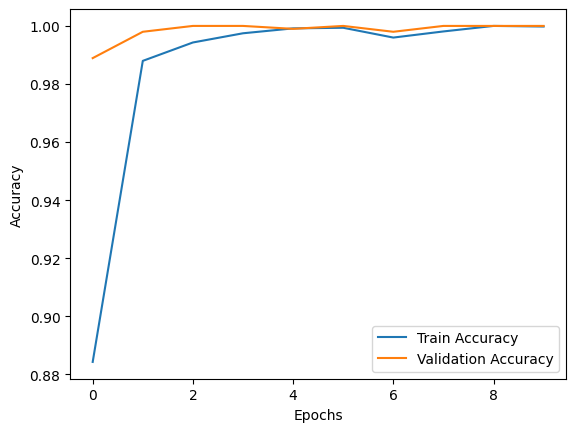

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Extract true labels from test_generator
y_true = []
y_pred = []

for i in range(len(test_generator)):  # Loop through batches
    X_batch, y_batch = test_generator[i]  # Get batch data
    y_true.extend(y_batch)  # Append true labels
    y_pred.extend(np.round(model.predict(X_batch)).flatten())  # Get predictions

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Hemorrhagic', 'Normal']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [47]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("brain_hemorrhage_model.h5")  # Change path if needed

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (224, 224))  # Resize to model's input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (224, 224, 1)
    img = np.expand_dims(img, axis=0)   # Add batch dimension (1, 224, 224, 1)
    return img

# Upload and test a sample image
image_path = r"C:\Users\RAJ\Downloads\hem.jpg"  # Corrected path
image = preprocess_image(image_path)

# Make prediction
prediction = model.predict(image)[0][0]

# Interpret result
threshold = 0.5  # Assuming sigmoid activation
if prediction >= threshold:
    print(f"🔴 Hemorrhagic detected (Confidence: {prediction:.2f})")
else:
    print(f"🟢 Normal (Confidence: {1 - prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
🔴 Hemorrhagic detected (Confidence: 1.00)


In [48]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("brain_hemorrhage_model.h5")  # Change path if needed

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (224, 224))  # Resize to model's input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (224, 224, 1)
    img = np.expand_dims(img, axis=0)   # Add batch dimension (1, 224, 224, 1)
    return img

# Upload and test a sample image
image_path = r"C:\Users\RAJ\Downloads\norm.png"  # Corrected path
image = preprocess_image(image_path)

# Make prediction
prediction = model.predict(image)[0][0]

# Interpret result
threshold = 0.5  # Assuming sigmoid activation
if prediction >= threshold:
    print(f"🔴 Hemorrhagic detected (Confidence: {prediction:.2f})")
else:
    print(f"🟢 Normal (Confidence: {1 - prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
🟢 Normal (Confidence: 1.00)
